In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 12s 37ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 2/5
235/235 [==============================] - 5s 21ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 3/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 4/5
235/235 [==============================] - 4s 15ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6945 - val_loss: 0.6944


Epoch 1/50
235/235 [==============================] - 14s 46ms/step - loss: 0.3835 - val_loss: 0.3216
Epoch 2/50
235/235 [==============================] - 8s 35ms/step - loss: 0.3112 - val_loss: 0.3076
Epoch 3/50
235/235 [==============================] - 7s 31ms/step - loss: 0.3025 - val_loss: 0.3020
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2979 - val_loss: 0.2986
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2950 - val_loss: 0.2958
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2929 - val_loss: 0.2941
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2911 - val_loss: 0.2925
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2896 - val_loss: 0.2909
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2883 - val_loss: 0.2899
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2870 - val_l

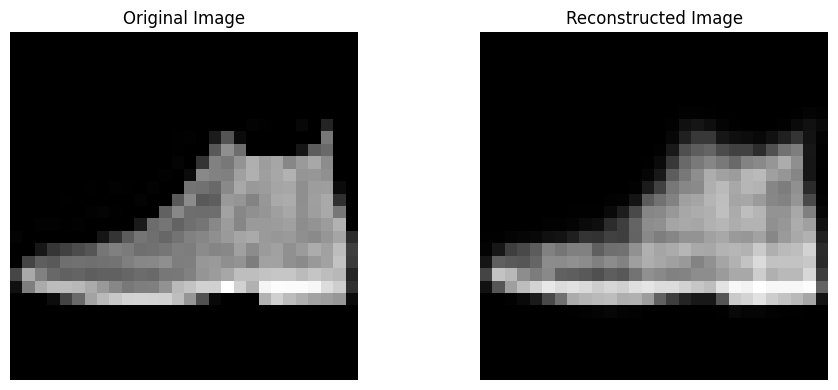

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Size of encoded representations
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(128, activation='relu')(input_img) # First encoding layer
encoded = Dense(64, activation='relu')(encoded)    # New added layer
encoded = Dense(encoding_dim, activation='relu')(encoded) # Second encoding layer

# Decoder layers
decoded = Dense(64, activation='relu')(encoded)    # New added layer
decoded = Dense(128, activation='relu')(decoded)   # First decoding layer
decoded = Dense(784, activation='sigmoid')(decoded) # Second decoding layer

# Model to map an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder for more epochs to get better results
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualization
plt.figure(figsize=(10, 4))

# Original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()